# Animal Identification InceptionV3

In [1]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

<h5><b>Cấu hình sử dụng GPU trong train data</b></h5>

In [2]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

<h5><b>Tạo Mô Hình InceptionV3</b></h5>

In [3]:
IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

In [9]:
folders = glob('./Data/animals/Train/*')
x = Flatten()(inception.output)

7

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

In [11]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('./Data/animals/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 35,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('./Data/animals/Test',
                                            target_size = (224, 224),
                                            batch_size = 35,
                                            class_mode = 'categorical')

Found 294 images belonging to 7 classes.
Found 84 images belonging to 7 classes.


In [14]:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=1,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\dobao\AppData\Local\Temp\ipykernel_4972\2021971047.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


9/9 [==============================] - 14s 1s/step - loss: 3.0735 - accuracy: 0.6633 - val_loss: 0.6537 - val_accuracy: 0.9286


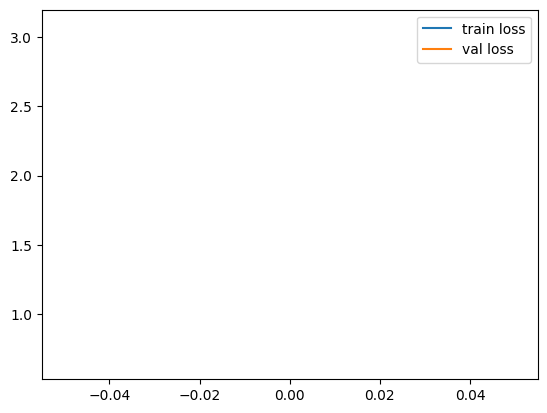

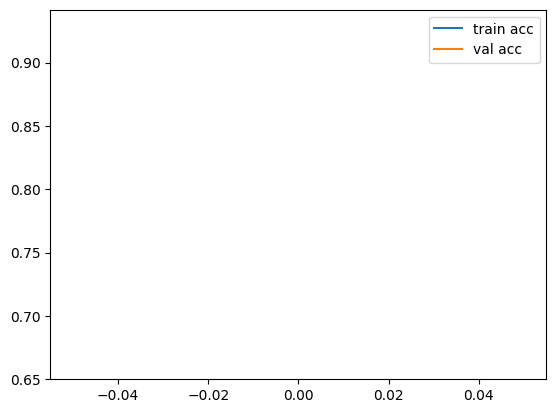

c:\Users\dobao\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

model.save('./animal.h5')